In [44]:
# Import dataset and display first 5 rows
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 


df=pd.read_csv("tvmarketing.csv")
df.head(15)

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9
5,8.7,7.2
6,57.5,11.8
7,120.2,13.2
8,8.6,4.8
9,199.8,10.6


In [45]:
# Check column data type
df.dtypes


TV       float64
Sales    float64
dtype: object

In [46]:
print(df['TV'].dtype)

float64


In [47]:
# Check the shape of the Data Frame (rows, columns)
df.shape[1]


2

In [48]:
# rows size

df.shape[0]

200

In [49]:
# Look at summary statistics
df.describe()



,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


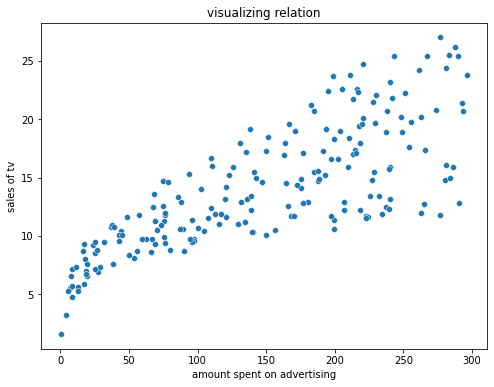

In [50]:
# Visualize the relationship between the features and the dependent variable
# using scatterplots
plt.figure(figsize=(8,6))

sns.scatterplot(x=df["TV"],y=df["Sales"])
plt.xlabel("amount spent on advertising")
plt.ylabel("sales of tv")
plt.title("visualizing relation")
plt.show()



In [51]:
# 6. Prepare X (feature variables) and y (response variable)


In [52]:
# 8. Print the shape of train data and test data



In [53]:
#performing linear regression manually


In [54]:
from sklearn.model_selection import train_test_split
x=df['TV']

y=df['Sales']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)


print(f"xtrain:{x_train.shape}, y_train:{y_train.shape},x_test:{x_test.shape},ytest:{y_test.shape}")


x_mean=np.mean(x_train)

y_mean=np.mean(y_train)

numerator=np.sum((x_train-x_mean)*(y_train-y_mean))
denominator=np.sum((x_train-x_mean)**2)
b1=numerator/denominator
b1



xtrain:(140,), y_train:(140,),x_test:(60,),ytest:(60,)


0.04640780212815278

In [55]:
b0=np.mean(y_train)-b1*np.mean(x_train)
b0


7.2394598307511355

In [56]:
print(f"Manual Calculation - Intercept (b0): {b0:.2f}, Coefficient (b1): {b1:.2f}")

Manual Calculation - Intercept (b0): 7.24, Coefficient (b1): 0.05


In [57]:
y_pred=b0+(b1*x_test)

y_pred


95     14.817854
15     16.307544
30     20.832305
158     7.782431
128    17.463099
115    10.724686
69     17.300671
170     9.559850
174    17.560555
45     15.365466
66      8.701306
182     9.847578
165    18.122089
78      7.490062
186    13.713348
177    15.138068
56      7.578237
152    16.409642
82     10.733967
68     18.256672
124    17.890050
16     10.385909
148     9.002956
93     18.883177
65     10.441598
60      9.722277
84     17.147526
67     13.704067
125    11.286220
132     7.629285
9      16.511739
18     10.450880
55     16.469972
75      8.023752
150    20.266130
104    18.293798
135     9.480957
137    19.941275
164    12.678454
76      8.515674
79     12.622765
197    15.453641
38      9.239636
24     10.130666
122    17.634808
195     9.012238
29     10.515851
19     14.075329
143    12.093716
86     10.780375
114    10.868550
173    15.054534
5       7.643208
126     7.601441
117    10.785016
73     13.244629
140    10.645793
98     20.683800
172     8.1490

In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
x=df[['TV']]
y=df['Sales']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

modell=LinearRegression()
modell.fit(x_train,y_train)

z = modell.predict(x_test)
print(z)

[14.81785392 16.30754437 20.83230507  7.78243112 17.46309864 10.72468577
 17.30067133  9.55984994 17.56055502 15.36546598  8.7013056   9.84757831
 18.12208943  7.49006196 13.71334823 15.13806775  7.57823679 16.40964153
 10.73396733 18.25667206 17.89005042 10.38590882  9.00295631 18.88317738
 10.44159818  9.72227724 17.14752559 13.70406667 11.28622018  7.62928537
 16.5117387  10.45087974 16.46997167  8.02375169 20.26612989 18.2937983
  9.48095667 19.94127527 12.67845424  8.51567439 12.62276488 15.45364081
  9.2396361  10.1306659  17.63480751  9.01223787 10.51585066 14.07532908
 12.09371593 10.78037513 10.86854996 15.05453371  7.64320771  7.60144069
 10.78501591 13.24462943 10.64579251 20.68380011  8.14905275 16.40964153]


In [59]:
modell.coef_

array([0.0464078])

In [60]:
modell.intercept_

7.239459830751138

# plotting the model between test data and train data
plt.scatter(x_train, y_train, color='blue', label='Train Data')
plt.plot(x_train,modell.predict(x_train),label="train data seperator line ",color="red")
plt.xlabel("advertisement")
plt.ylabel("sales")
plt.title("train and test data plot ")
plt.legend()
plt.show()


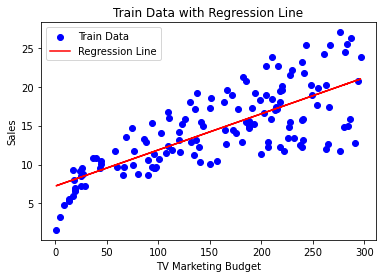

In [61]:
plt.scatter(x_train, y_train, color='blue', label='Train Data')
plt.plot(x_train, modell.predict(x_train), color='red', label='Regression Line')
plt.xlabel('TV Marketing Budget')
plt.ylabel('Sales')
plt.title('Train Data with Regression Line')
plt.legend()
plt.show()

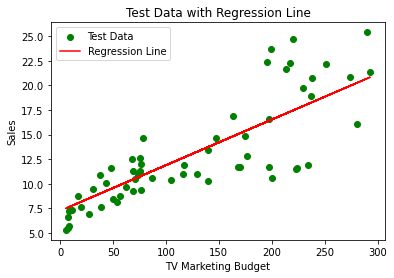

In [62]:
# Step 15: Plot test data and model
plt.scatter(x_test, y_test, color='green', label='Test Data')
plt.plot(x_test, z, color='red', label='Regression Line')
plt.xlabel('TV Marketing Budget')
plt.ylabel('Sales')
plt.title('Test Data with Regression Line')
plt.legend()
plt.show()

In [63]:
from sklearn.metrics import mean_squared_error,r2_score

mse = mean_squared_error(y_test, z)
r2 = r2_score(y_test, z)
print("\nMean Squared Error:", mse)
print("R Squared Value:", r2)


Mean Squared Error: 8.970991242413614
R Squared Value: 0.6714477229302764


In [85]:
# Step 17: Calculate R Squared and Adjusted R Squared without library
ss_total = np.sum((y_test - np.mean(y_test))**2)
ss_residual = np.sum((y_test - y_pred)**2)
r2_manual = 1 - (ss_residual / ss_total)
adj_r2_manual = 1 - ((1 - r2_manual) * (len(y_test) - 1) / (len(y_test) - x_test.shape[1] - 1))
print("\nManual R Squared:", r2_manual)
print("Manual Adjusted R Squared:", adj_r2_manual)


Manual R Squared: 0.6714477229302767
Manual Adjusted R Squared: 0.66578302849804
